## Streambatch NDVI API Tutorial

The Streambatch API delivers time series NDVI data as a pandas DataFrame. The API is asynchronous: to get an NDVI time series, you send a query to the server and wait for processing to complete. You then fetch the output.

At the very least, a query must specify one or more locations for NDVI measurement. Locations can be single points or polygons.

To begin:

`pip install streambatch`

In [1]:
from streambatch import StreambatchConnection

### NDVI for single points

In [3]:
point1 = [3.940705,49.345238] # longitude, latitude
point2 = [-48.592917,-21.758722]

# Connect to the Streambatch API
api_key = open('./../notebooks/key.txt').read() # !!! replace with your own API key
connection = StreambatchConnection(api_key=api_key)

# request an NDVI time for the points
query_id = connection.request_ndvi(     points=[point1,point2],     # a list of points         
                                        start_date='2019-01-01',    # optional, defaults to 2013-01-01
                                        end_date='2019-12-31',      # optional, defaults to today
                                        aggregation='median')       # optional, defaults to median

Query ID: be927017-da09-40f5-b023-155d3cead0e6
Number of points: 2
Start date: 2019-01-01
End date: 2019-12-31
Aggregation: median


At this point the server is processing the request. A single locations will take several minutes to process. Note, specifying tens or hundreds of locations will still only take minutes to process. A list containing thousands of locations can take tens of minutes to process.

In [4]:
# get_data() will block until the data is ready
df = connection.get_data(query_id)
df.head()

..............................


,time,location,lat,lon,ndvi
0,2019-01-01,0,49.345238,3.940705,0.506371
1,2019-01-02,0,49.345238,3.940705,0.505769
2,2019-01-03,0,49.345238,3.940705,0.505167
3,2019-01-04,0,49.345238,3.940705,0.504565
4,2019-01-05,0,49.345238,3.940705,0.503963


### NDVI for a polygon

Give a list of polygons (instead of points) to generate NDVI for polygons.

Other params (`start_date`, `end_date`, `aggregation`) are not set and will hence be set to the defaults noted above.

In [5]:
some_polygon = {
    'type': 'Polygon',
    'coordinates': 
        [[[-94.4545917478666, 41.9792090154671], 
        [-94.4545448033213, 41.9757220431519], 
        [-94.4450066084548, 41.9757090969481], 
        [-94.4450437851949, 41.9792826686391], 
        [-94.4545917478666, 41.9792090154671]]]
}

query_id = connection.request_ndvi(polygons=[some_polygon]) # polygons is a list of polygons

Query ID: 9665928a-b243-4f4a-8bd9-9019eac3d130
Number of polygons: 1
Start date: 2013-01-01
End date: 2023-09-12
Aggregation: median


In [6]:
# If you want you can manually check if the data is ready
import time
print('Waiting for data...',end="",flush=True)
while not connection.query_done(query_id):
    time.sleep(8)
    print(".",end="",flush=True)
print("done.")

df = connection.get_data(query_id)
df.head()

Waiting for data........done.



,time,location,polygon,ndvi
0,2013-04-25,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.215576
1,2013-04-26,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.216830
2,2013-04-27,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.218084
3,2013-04-28,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.219338
4,2013-04-29,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.220593


## Plotted

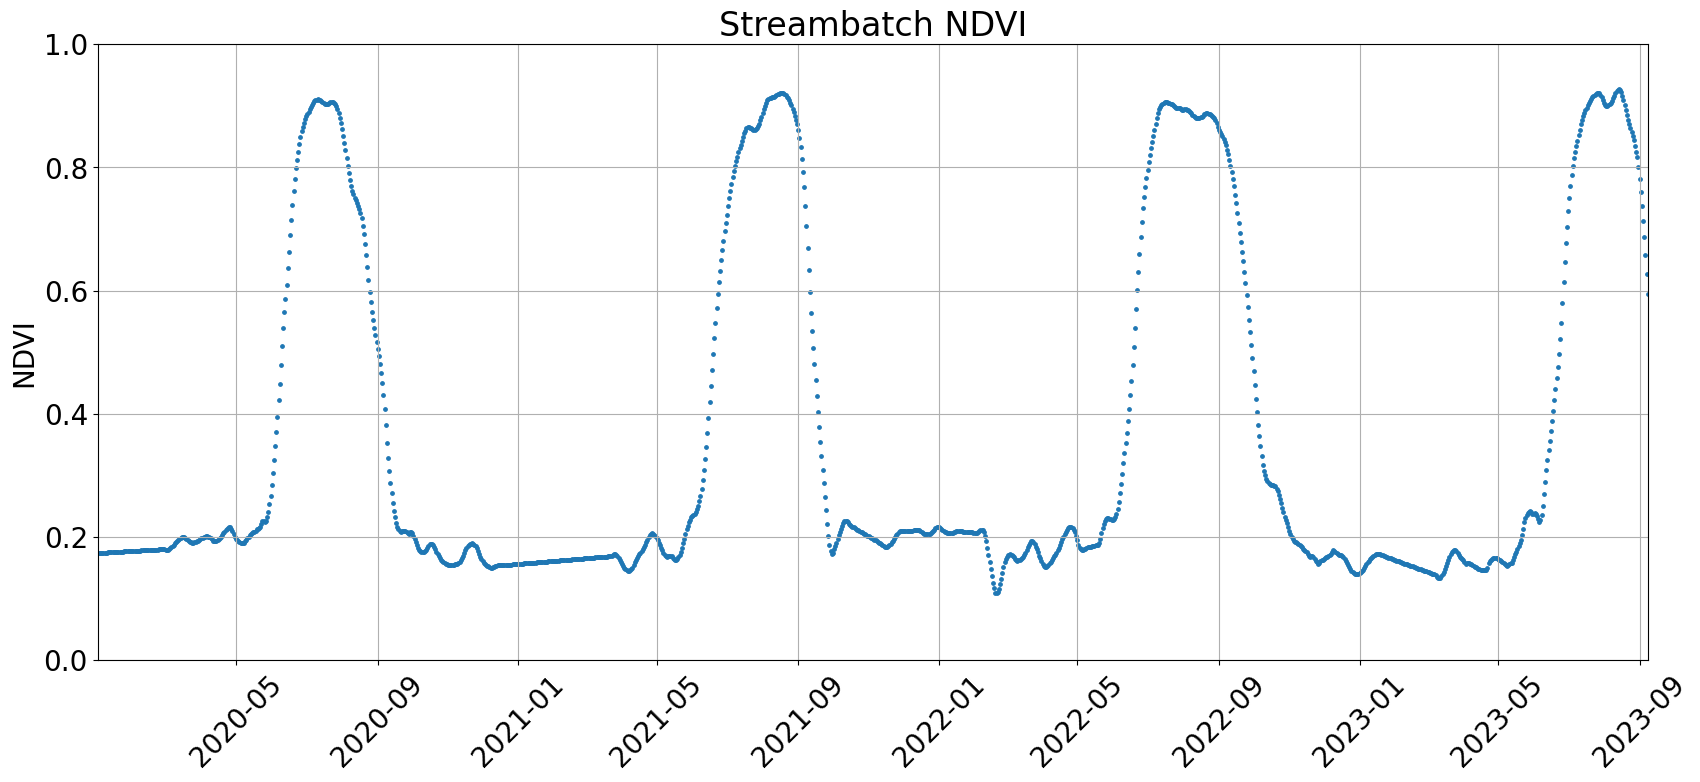

In [7]:
# Plot the data
import matplotlib.pyplot as plt

df1 = df[df['time']>'2020-01-01']
plt.rc('font', size=20)
plt.scatter(df1['time'],df1['ndvi'],s=6)
plt.gcf().set_size_inches(20, 8)
ax = plt.gca()
ax.margins(0)
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('NDVI')
plt.title('Streambatch NDVI')
plt.show()